In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root

In [2]:
def dxdt(t,x,tau_r,tau_f):
    a = x[0]
    b = x[1]
    
    return [ -a/tau_r, -b/tau_f]

In [3]:
t0 = 0
tfinal = 10
dt = 0.01

t = np.linspace(0, tfinal, 1000)


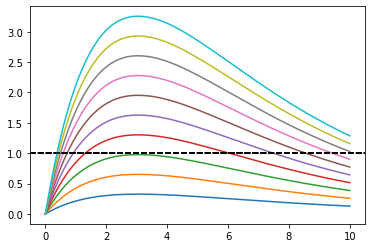

In [4]:
for f in np.linspace(1,10,10):
    # f = 3.07 looks like correct value
    x0 = [f,f]
    
    sol = solve_ivp(dxdt,[t0,tfinal],x0,args=(2,5),dense_output=True)
    
    a = sol.sol(t)[0]
    b = sol.sol(t)[1]

    s = b - a

    plt.plot(t,s)
    plt.axhline(1, color='k', linestyle='--', label='y=1')
# plt.plot(t,np.ones(t.shape),'k--')
# plt.axis([2,4,0.95,1.05])

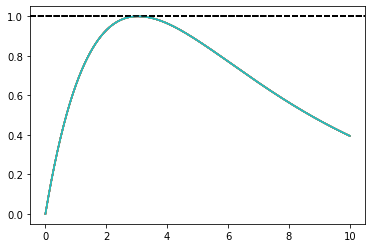

In [5]:
for f in np.linspace(1,10,10):
    f = 3.07 #looks like correct value
    x0 = [f,f]
    
    sol = solve_ivp(dxdt,[t0,tfinal],x0,args=(2,5),dense_output=True)
    
    a = sol.sol(t)[0]
    b = sol.sol(t)[1]

    s = b - a

    plt.plot(t,s)
    plt.axhline(1, color='k', linestyle='--', label='y=1')
# plt.plot(t,np.ones(t.shape),'k--')
# plt.axis([2,4,0.95,1.05])

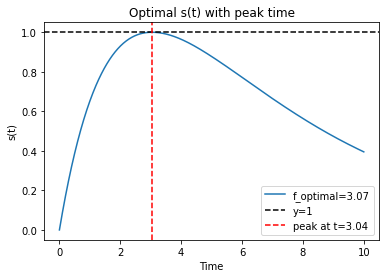

Optimal f: 3.0713828029683845
Time at peak (s=1): 3.043043043043043


In [73]:
def dxdt(t, x, tau_r, tau_f):
    a = x[0]
    b = x[1]
    return [-a/tau_r, -b/tau_f]

# Define a function that computes the maximum of s(t) and the time it occurs for a given initial f
def max_s_for_f(f, t0=0, tfinal=10, tau_r=2, tau_f=5):
    x0 = [f, f]  # Initial conditions for a and b
    sol = solve_ivp(dxdt, [t0, tfinal], x0, args=(tau_r, tau_f), dense_output=True)
    
    # Evaluate solution for t values
    t = np.linspace(t0, tfinal, 1000)
    a = sol.sol(t)[0]
    b = sol.sol(t)[1]
    s = b - a
    
    # Find the maximum of s(t) and the corresponding time
    max_s = np.max(s)
    peak_time = t[np.argmax(s)]
    
    return max_s, peak_time

# Define the target function to find the root (i.e., when max_s(t) = 1)
def target_function(f_array):
    f = f_array[0]  # Extract scalar from array
    max_s, _ = max_s_for_f(f)  # We only care about max_s here
    return max_s - 1  # We want this to be 0 when max_s(t) = 1

# Use a root-finding algorithm to solve for f
sol_f = root(target_function, x0=[3])  # Initial guess for f wrapped in a list

# Extract the solution
f_optimal = sol_f.x[0]

# Now solve with the optimal f to find peak time
max_s, peak_time = max_s_for_f(f_optimal)

# Plot the result with the optimal f
t = np.linspace(0, 10, 1000)
x0 = [f_optimal, f_optimal]
sol = solve_ivp(dxdt, [0, 10], x0, args=(2, 5), dense_output=True)
a = sol.sol(t)[0]
b = sol.sol(t)[1]
s = b - a

# Plot s(t) and mark the peak
plt.plot(t, s, label=f'f_optimal={f_optimal:.2f}')
plt.axhline(1, color='k', linestyle='--', label='y=1')
plt.axvline(peak_time, color='r', linestyle='--', label=f'peak at t={peak_time:.2f}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('s(t)')
plt.title('Optimal s(t) with peak time')
plt.show()

print(f'Optimal f: {f_optimal:}')
print(f'Time at peak (s=1): {peak_time:}')


In [20]:
def dxdt_new(t, x, tau_s):
    s = x[0]
    p = x[1]
    dsdt = -s/tau_s + p/tau_s
    dpdt = -p/tau_s
    return [dsdt, dpdt]

In [21]:
t0 = 0
tfinal = 10
dt = 0.01

t = np.linspace(t0, tfinal, 1000)

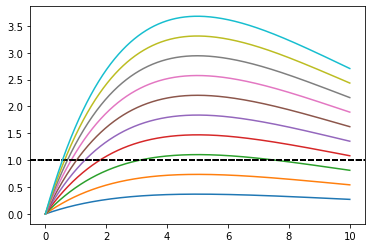

In [27]:
for f in np.linspace(1,10,10):
    
    x0 = [0,f]
    
    sol = solve_ivp(dxdt_new,[t0,tfinal],x0,args=(5,),dense_output=True)
    
    s = sol.sol(t)[0]
    p = sol.sol(t)[1]

    plt.axhline(1, color='k', linestyle='--', label='y=1')

    plt.plot(t,s)

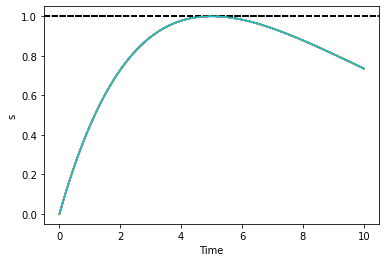

In [34]:
for f in np.linspace(1,10,10):
    
    x0 = [0,2.7185823035951033]
    
    sol = solve_ivp(dxdt_new,[t0,tfinal],x0,args=(5,),dense_output=True)
    
    s = sol.sol(t)[0]
    p = sol.sol(t)[1]

    plt.axhline(1, color='k', linestyle='--', label='y=1')

    plt.plot(t,s)
    plt.xlabel('Time')
    plt.ylabel('s')

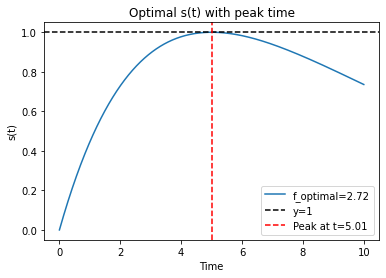

Optimal f: 2.7185823035951033
Time at peak (s=1): 5.005005005005005


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root

# Define the system of differential equations for s and p
def dxdt_new(t, x, tau_s):
    s = x[0]
    p = x[1]
    # Differential equations for s and p
    dsdt = -s / tau_s + p / tau_s
    dpdt = -p / tau_s
    return [dsdt, dpdt]

# Define a function that computes the maximum of s(t) for a given initial p = f
def max_s_for_f(f, t0=0, tfinal=10, tau_s=10):
    s0 = 0  # Initial condition for s
    p0 = f  # Initial condition for p
    x0 = [s0, p0]  # Initial conditions for s and p
    
    # Solve the system of differential equations
    sol = solve_ivp(dxdt_new, [t0, tfinal], x0, args=(tau_s,), dense_output=True)
    
    # Evaluate solution for t values
    t = np.linspace(t0, tfinal, 1000)
    s = sol.sol(t)[0]  # Extract s(t)
    
    # Find the maximum of s(t) and the corresponding time
    max_s = np.max(s)
    peak_time = t[np.argmax(s)]
    
    return max_s, peak_time

# Define the target function to find the root (i.e., when max_s(t) = 1)
def target_function(f_array):
    f = f_array[0]  # Extract scalar from array
    max_s, _ = max_s_for_f(f)  # We only care about max_s here
    return max_s - 1  # We want this to be 0 when max_s(t) = 1

# Use a root-finding algorithm to solve for f
sol_f = root(target_function, x0=[3])  # Initial guess for f wrapped in a list

# Extract the solution
f_optimal = sol_f.x[0]

# Now solve with the optimal f to find peak time
_, peak_time = max_s_for_f(f_optimal, tau_s=5)  # tau_s=5 is used for final plotting as in original code

# Plot the result with the optimal f
t = np.linspace(0, 10, 1000)
x0 = [0, f_optimal]
sol = solve_ivp(dxdt_new, [0, 10], x0, args=(5,), dense_output=True)  # Use tau_s=5 as specified in plot step
s = sol.sol(t)[0]  # Extract s(t)

# Plot s(t) and mark the peak
plt.plot(t, s, label=f'f_optimal={f_optimal:.2f}')
plt.axhline(1, color='k', linestyle='--', label='y=1')
plt.axvline(peak_time, color='r', linestyle='--', label=f'Peak at t={peak_time:.2f}')
plt.legend()
plt.xlabel('Time')
plt.ylabel('s(t)')
plt.title('Optimal s(t) with peak time')
plt.show()

print(f'Optimal f: {f_optimal:}')
print(f'Time at peak (s=1): {peak_time:}')


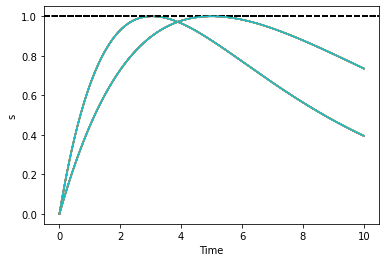

In [31]:
for f in np.linspace(1,10,10):
    f = 3.0713828029683845 #looks like correct value
    x0 = [f,f]
    
    sol = solve_ivp(dxdt,[t0,tfinal],x0,args=(2,5),dense_output=True)
    
    a = sol.sol(t)[0]
    b = sol.sol(t)[1]

    s = b - a

    plt.plot(t,s)
    plt.axhline(1, color='k', linestyle='--', label='y=1')
# plt.plot(t,np.ones(t.shape),'k--')
# plt.axis([2,4,0.95,1.05])
for f in np.linspace(1,10,10):
    
    x0 = [0,2.7185823035951033]
    
    sol = solve_ivp(dxdt_new,[t0,tfinal],x0,args=(5,),dense_output=True)
    
    s = sol.sol(t)[0]
    p = sol.sol(t)[1]

    plt.axhline(1, color='k', linestyle='--', label='y=1')

    plt.plot(t,s)
    plt.xlabel('Time')
    plt.ylabel('s')

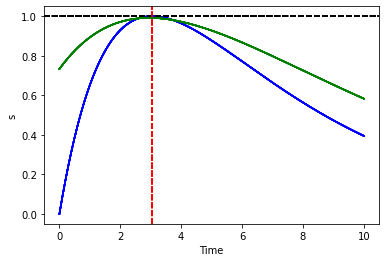

In [124]:
for f in np.linspace(1,10,10):
    f = 3.0713828029683845 #looks like correct value
    x0 = [f,f]
    
    sol = solve_ivp(dxdt,[t0,tfinal],x0,args=(2,5),dense_output=True)
    
    a = sol.sol(t)[0]
    b = sol.sol(t)[1]

    s = b - a

    plt.plot(t,s, color = 'blue',label = 'Paper')
    plt.axhline(1, color='k', linestyle='--', label='y=1')
# plt.plot(t,np.ones(t.shape),'k--')
# plt.axis([2,4,0.95,1.05])
for f in np.linspace(1,10,10):
    
    x0 = [0.7333333333333333,1.788888888888889]
    
    sol = solve_ivp(dxdt_new,[t0,tfinal],x0,args=(5,),dense_output=True)
    
    s = sol.sol(t)[0]
    p = sol.sol(t)[1]

    plt.axhline(1, color='k', linestyle='--', label='y=1')

    plt.plot(t,s, color = 'green', label = '2nd order synaptic')
    plt.xlabel('Time')
    plt.ylabel('s')
    plt.axvline(3.043043043043043, color='r', linestyle='--', label=f'Peak at t={peak_time:.2f}')

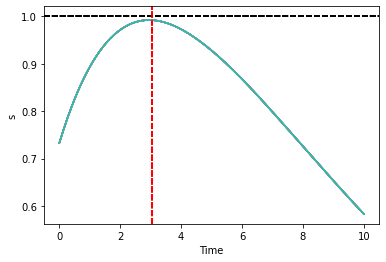

In [117]:
for f in np.linspace(1,10,10):
    
    x0 = [0.7333333333333333,1.788888888888889]
    
    sol = solve_ivp(dxdt_new,[t0,tfinal],x0,args=(5,),dense_output=True)
    
    s = sol.sol(t)[0]
    p = sol.sol(t)[1]

    plt.axhline(1, color='k', linestyle='--', label='y=1')

    plt.plot(t,s)
    plt.xlabel('Time')
    plt.ylabel('s')
    plt.axvline(3.043043043043043, color='r', linestyle='--', label=f'Peak at t={peak_time:.2f}')


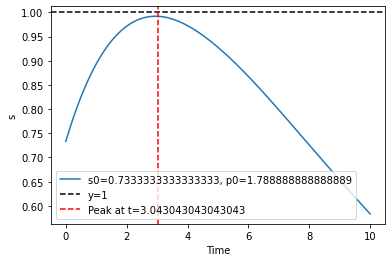

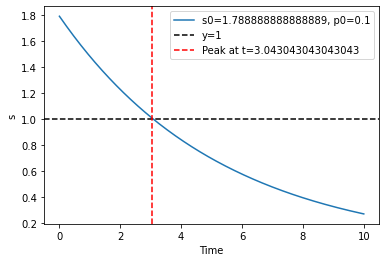

Successful initial conditions (s0, p0) for s(target_time) = 1.0:
s0 = 0.7333333333333333, p0 = 1.788888888888889
s0 = 1.788888888888889, p0 = 0.1
Initial conditions: s0 = 0.7333333333333333, p0 = 1.788888888888889
s(3.043043043043043) = 0.9918 (Difference from target: -0.0082)

Initial conditions: s0 = 1.788888888888889, p0 = 0.1
s(3.043043043043043) = 1.0060 (Difference from target: 0.0060)



In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation
def dxdt_new(t, x, tau_s):
    s = x[0]
    p = x[1]
    dsdt = -s/tau_s + p/tau_s
    dpdt = -p/tau_s
    return [dsdt, dpdt]

# Time interval and parameters
t0 = 0
tfinal = 10
target_time = 3.043043043043043
target_s_value = 1.0
tau_s = 5

# Define the time array for plotting and evaluation
t = np.linspace(t0, tfinal, 300)

# Initialize list to store successful x0 pairs
successful_x0 = []

# Define ranges for initial conditions to test
s_initial_values = np.linspace(0.1, 2.0, 10)
p_initial_values = np.linspace(0.1, 2.0, 10)

# Loop over initial values
for s0 in s_initial_values:
    for p0 in p_initial_values:
        
        # Solve the ODE with the current initial conditions
        sol = solve_ivp(dxdt_new, [t0, tfinal], [s0, p0], args=(tau_s,), dense_output=True)
        
        # Evaluate solution at target_time
        s_at_target_time = sol.sol(target_time)[0]
        
        # Check if this solution meets the target condition
        if np.isclose(s_at_target_time, target_s_value, atol=0.01):
            successful_x0.append((s0, p0))  # Save the successful initial conditions

            # Plotting for visualization (optional)
            s_values = sol.sol(t)[0]
            p_values = sol.sol(t)[1]
            plt.plot(t, s_values, label=f's0={s0}, p0={p0}')
            plt.axhline(target_s_value, color='k', linestyle='--', label='y=1')
            plt.axvline(target_time, color='r', linestyle='--', label=f'Peak at t={target_time}')
            plt.xlabel('Time')
            plt.ylabel('s')
            plt.legend()
            plt.show()

# Print successful initial conditions
print("Successful initial conditions (s0, p0) for s(target_time) = 1.0:")
for (s0, p0) in successful_x0:
    print(f"s0 = {s0}, p0 = {p0}")

# Initialize lists for storing successful initial conditions and solutions
successful_x0 = []
solutions_s = []  # To store s values for each successful initial condition
solutions_p = []  # To store p values for each successful initial condition

# Loop over initial values
for s0 in s_initial_values:
    for p0 in p_initial_values:
        
        # Solve the ODE with the current initial conditions
        sol = solve_ivp(dxdt_new, [t0, tfinal], [s0, p0], args=(tau_s,), dense_output=True)
        
        # Evaluate solution at target_time
        s_at_target_time = sol.sol(target_time)[0]
        
        # Check if this solution meets the target condition
        if np.isclose(s_at_target_time, target_s_value, atol=0.01):
            successful_x0.append((s0, p0))  # Save successful initial conditions
            solutions_s.append(sol.sol(t)[0])  # Store s solution for plotting later
            solutions_p.append(sol.sol(t)[1])  # Store p solution for plotting later

            # Print the result for this successful initial condition
            print(f"Initial conditions: s0 = {s0}, p0 = {p0}")
            print(f"s({target_time}) = {s_at_target_time:.4f} (Difference from target: {s_at_target_time - target_s_value:.4f})\n")